# Examples using the SQL data source

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from config import db
import numpy as np

## ICD Groups

* http://apps.who.int/classifications/icd10/browse/2016/en

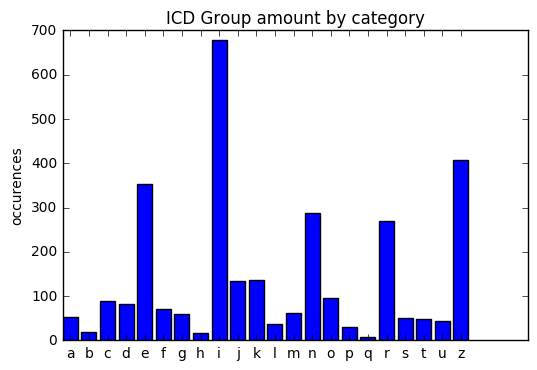

In [2]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT char, count(char)
    FROM (
        SELECT lower(substr(icd_3stellig,1,1)) as char 
        FROM icd
    )
    GROUP BY char
    ORDER BY char
''')
data = c.fetchall()
ind = np.arange(len(data))
fig, ax = plt.subplots()
ax.bar(ind, [row[1] for row in data])
ax.set_ylabel('occurences')
ax.set_title('ICD Group amount by category')
ax.set_xticks(ind + .4)
ax.set_xticklabels(row[0] for row in data);

### Specific ICD group example
Pregnancy related stuff has an ICD starting with 'O'.

* http://apps.who.int/classifications/icd10/browse/2016/en#/XV


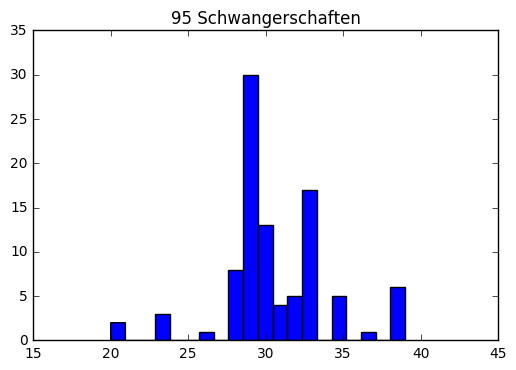

In [12]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag 
    FROM records LEFT OUTER JOIN icd USING (pat_neu)
    WHERE lower(substr(icd_3stellig,1,1)) = 'o'
    ORDER BY alter_in_jahren_am_aufnahmetag
''')
data = c.fetchall()
plt.title('{} Schwangerschaften'.format(len(data)))
plt.axis([15, 45, 0, 35])
plt.hist([row[0] for row in data], 20);

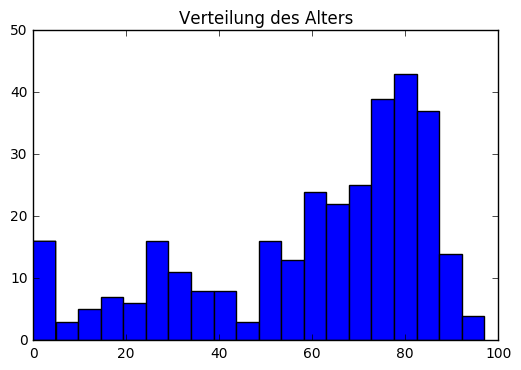

In [8]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag
    FROM records
''')
data = c.fetchall()
plt.title('Verteilung des Alters')
plt.axis([0, 100, 0, 50])
plt.hist([row[0] for row in data], 20);

In [20]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag, icd_kode, icd_3stellig_klarname
    FROM records LEFT OUTER JOIN icd USING (pat_neu)
    WHERE alter_in_jahren_am_aufnahmetag > 50 
    AND icd_3stellig IN ("G47","N28") 
    ORDER BY alter_in_jahren_am_aufnahmetag
''')
data = np.asarray(c.fetchall())

print(data[:,0])

['56' '58' '58' '59' '60' '60' '60' '69' '69' '72' '75' '79' '79' '79' '79'
 '82' '86' '86' '91']


Es scheinen weitaus mehr Daten für ältere Patienten vorzuliegen, außerdem sind manche Altersangaben abhängig davon gefüllt ob es sich um einen Säugling oder Erwachsenen handelt.

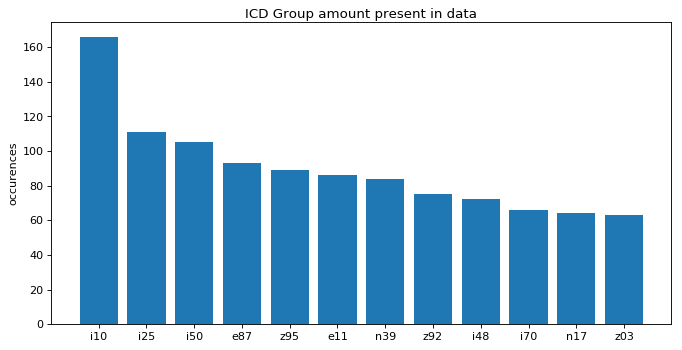

In [26]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT char, count(char) as anz
    FROM (
        SELECT lower(substr(icd_3stellig,1,3)) as char 
        FROM icd
    )
    GROUP BY char
    ORDER BY anz desc
    LIMIT 12
''')
data = c.fetchall()
ind = np.arange(len(data))
fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.bar(ind, [row[1] for row in data])
ax.set_ylabel('occurences')
ax.set_title('ICD Group amount present in data')
ax.set_xticks(ind + .4)
ax.set_xticklabels(row[0] for row in data);

In [48]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT(icd_3stellig)
    FROM icd
    ORDER BY icd_3stellig
''')
icd_count = c.fetchall()

c.execute('''
    SELECT icd_3stellig, COUNT(*)
    FROM icd LEFT JOIN records ON records.pat_neu = icd.pat_neu
    WHERE geschlecht = 'w'
    GROUP BY icd_3stellig
''')

women = c.fetchall()

c.execute('''
    SELECT icd_3stellig, COUNT(*)
    FROM icd LEFT JOIN records ON records.pat_neu = icd.pat_neu
    WHERE geschlecht = 'm'
    GROUP BY icd_3stellig
''')
men = c.fetchall()

print(icd_count)
print(len(icd_count))
print(len(women))

ind = np.arange(len(icd_count))  # the x locations for the groups
width = 0.35       # the width of the bars
rects1 = ax.bar(ind, women, width, color='r')
rects2 = ax.bar(ind, men, width, color='b')

ax.set_xticks(ind + width)
ax.set_xticklabels(icd_count)

#plt.title('Verteilung Geschlecht')
#plt.hist(data);

[('A02',), ('A04',), ('A09',), ('A40',), ('A41',), ('A46',), ('A49',), ('A56',), ('A69',), ('A98',), ('B02',), ('B18',), ('B27',), ('B37',), ('B59',), ('B91',), ('B94',), ('B99',), ('C15',), ('C16',), ('C18',), ('C20',), ('C34',), ('C49',), ('C50',), ('C54',), ('C56',), ('C61',), ('C64',), ('C65',), ('C67',), ('C77',), ('C78',), ('C79',), ('C90',), ('C91',), ('C92',), ('D06',), ('D18',), ('D25',), ('D32',), ('D35',), ('D37',), ('D38',), ('D43',), ('D44',), ('D47',), ('D50',), ('D53',), ('D59',), ('D61',), ('D62',), ('D64',), ('D65',), ('D68',), ('D69',), ('E01',), ('E03',), ('E05',), ('E10',), ('E11',), ('E22',), ('E23',), ('E41',), ('E43',), ('E51',), ('E53',), ('E55',), ('E66',), ('E73',), ('E78',), ('E79',), ('E83',), ('E85',), ('E86',), ('E87',), ('E88',), ('F01',), ('F03',), ('F05',), ('F10',), ('F13',), ('F17',), ('F32',), ('F41',), ('F45',), ('F50',), ('F51',), ('F60',), ('F79',), ('F90',), ('F95',), ('G20',), ('G21',), ('G25',), ('G35',), ('G40',), ('G41',), ('G44',), ('G47',),

ValueError: incompatible sizes: argument 'height' must be length 406 or scalar